<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.166560,27.775891,64.743862,92.325314,-0.000381,278.011245,278.008423,0.002822
1,0.0,1.0,62.485569,78.486608,95.766567,43.391142,0.009084,290.138970,290.131425,0.007545
2,0.0,2.0,82.352198,96.419910,73.162382,32.611890,-0.020996,294.525384,294.548639,-0.023255
3,0.0,3.0,96.467410,88.528888,36.568341,41.873250,-0.000594,273.437295,273.437898,-0.000603
4,0.0,4.0,71.251553,38.159169,63.261346,41.596880,0.024557,224.293505,224.268223,0.025282
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,79.772408,63.286199,28.502465,24.555826,0.022132,206.139030,206.116968,0.022062
119996,999.0,116.0,76.553394,30.522801,37.344149,94.457696,-0.010802,248.867239,248.870452,-0.003214
119997,999.0,117.0,80.267284,88.951947,78.049242,58.853326,-0.001794,316.120005,316.121901,-0.001896
119998,999.0,118.0,24.344754,44.805654,85.227839,72.949813,0.049128,237.377189,237.329276,0.047913


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.166560,27.775891,64.743862,92.325314,-0.000381,278.011245,278.008423,0.002822
1,0.0,1.0,62.485569,78.486608,95.766567,43.391142,0.009084,290.138970,290.131425,0.007545
2,0.0,2.0,82.352198,96.419910,73.162382,32.611890,-0.020996,294.525384,294.548639,-0.023255
3,0.0,3.0,96.467410,88.528888,36.568341,41.873250,-0.000594,273.437295,273.437898,-0.000603
4,0.0,4.0,71.251553,38.159169,63.261346,41.596880,0.024557,224.293505,224.268223,0.025282
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,79.772408,63.286199,28.502465,24.555826,0.022132,206.139030,206.116968,0.022062
119996,999.0,116.0,76.553394,30.522801,37.344149,94.457696,-0.010802,248.867239,248.870452,-0.003214
119997,999.0,117.0,80.267284,88.951947,78.049242,58.853326,-0.001794,316.120005,316.121901,-0.001896
119998,999.0,118.0,24.344754,44.805654,85.227839,72.949813,0.049128,237.377189,237.329276,0.047913


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.166560  27.775891  64.743862  92.325314 -0.000381  278.011245   
      1.0    62.485569  78.486608  95.766567  43.391142  0.009084  290.138970   
      2.0    82.352198  96.419910  73.162382  32.611890 -0.020996  294.525384   
      3.0    96.467410  88.528888  36.568341  41.873250 -0.000594  273.437295   
      4.0    71.251553  38.159169  63.261346  41.596880  0.024557  224.293505   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  79.772408  63.286199  28.502465  24.555826  0.022132  206.139030   
      116.0  76.553394  30.522801  37.344149  94.457696 -0.010802  248.867239   
      117.0  80.267284  88.951947  78.049242  58.853326 -0.001794  316.120005   
      118.0  24.344754  44.805654  85.227839  72.949813  0.049128  237.377189   
      119.0  71.323817  66.090071  83.797092  62.634190 -0.016271  293.828900   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    278.008423  0.002822  
      1.0    290.131425  0.007545  
      2.0    294.548639 -0.023255  
      3.0    273.437898 -0.000603  
      4.0    224.268223  0.025282  
...                 ...       ...  
999.0 115.0  206.116968  0.022062  
      116.0  248.870452 -0.003214  
      117.0  316.121901 -0.001896  
      118.0  237.329276  0.047913  
      119.0  293.845530 -0.016630  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.166560  27.775891  64.743862  92.325314 -0.000381  278.011245   
      1.0    62.485569  78.486608  95.766567  43.391142  0.009084  290.138970   
      2.0    82.352198  96.419910  73.162382  32.611890 -0.020996  294.525384   
      3.0    96.467410  88.528888  36.568341  41.873250 -0.000594  273.437295   
      4.0    71.251553  38.159169  63.261346  41.596880  0.024557  224.293505   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  79.772408  63.286199  28.502465  24.555826  0.022132  206.139030   
      116.0  76.553394  30.522801  37.344149  94.457696 -0.010802  248.867239   
      117.0  80.267284  88.951947  78.049242  58.853326 -0.001794  316.120005   
      118.0  24.344754  44.805654  85.227839  72.949813  0.049128  237.377189   
      119.0  71.323817  66.090071  83.797092  62.634190 -0.016271  293.828900   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    278.008423  0.002822  
      1.0    290.131425  0.007545  
      2.0    294.548639 -0.023255  
      3.0    273.437898 -0.000603  
      4.0    224.268223  0.025282  
...                 ...       ...  
999.0 115.0  206.116968  0.022062  
      116.0  248.870452 -0.003214  
      117.0  316.121901 -0.001896  
      118.0  237.329276  0.047913  
      119.0  293.845530 -0.016630  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.166560,27.775891,64.743862,92.325314,-0.000381,278.011245,278.008423,0.002822
1,0.0,1.0,62.485569,78.486608,95.766567,43.391142,0.009084,290.138970,290.131425,0.007545
2,0.0,2.0,82.352198,96.419910,73.162382,32.611890,-0.020996,294.525384,294.548639,-0.023255
3,0.0,3.0,96.467410,88.528888,36.568341,41.873250,-0.000594,273.437295,273.437898,-0.000603
4,0.0,4.0,71.251553,38.159169,63.261346,41.596880,0.024557,224.293505,224.268223,0.025282
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,79.772408,63.286199,28.502465,24.555826,0.022132,206.139030,206.116968,0.022062
119996,999.0,116.0,76.553394,30.522801,37.344149,94.457696,-0.010802,248.867239,248.870452,-0.003214
119997,999.0,117.0,80.267284,88.951947,78.049242,58.853326,-0.001794,316.120005,316.121901,-0.001896
119998,999.0,118.0,24.344754,44.805654,85.227839,72.949813,0.049128,237.377189,237.329276,0.047913


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.166560  27.775891  64.743862  92.325314 -0.000381  278.011245   
      1.0    62.485569  78.486608  95.766567  43.391142  0.009084  290.138970   
      2.0    82.352198  96.419910  73.162382  32.611890 -0.020996  294.525384   
      3.0    96.467410  88.528888  36.568341  41.873250 -0.000594  273.437295   
      4.0    71.251553  38.159169  63.261346  41.596880  0.024557  224.293505   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  79.772408  63.286199  28.502465  24.555826  0.022132  206.139030   
      116.0  76.553394  30.522801  37.344149  94.457696 -0.010802  248.867239   
      117.0  80.267284  88.951947  78.049242  58.853326 -0.001794  316.120005   
      118.0  24.344754  44.805654  85.227839  72.949813  0.049128  237.377189   
      119.0  71.323817  66.090071  83.797092  62.634190 -0.016271  293.828900   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    278.008423  0.002822  
      1.0    290.131425  0.007545  
      2.0    294.548639 -0.023255  
      3.0    273.437898 -0.000603  
      4.0    224.268223  0.025282  
...                 ...       ...  
999.0 115.0  206.116968  0.022062  
      116.0  248.870452 -0.003214  
      117.0  316.121901 -0.001896  
      118.0  237.329276  0.047913  
      119.0  293.845530 -0.016630  

[120000 rows x 8 columns]

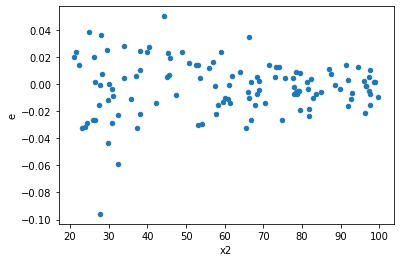

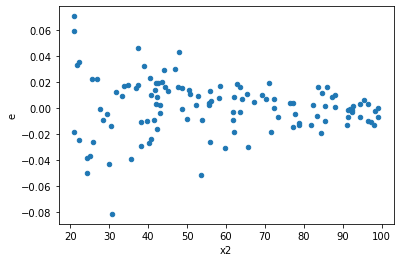

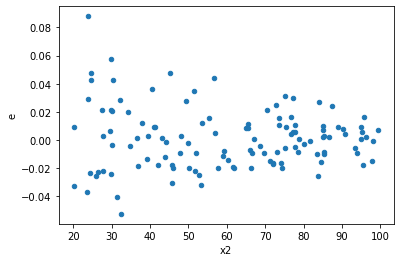

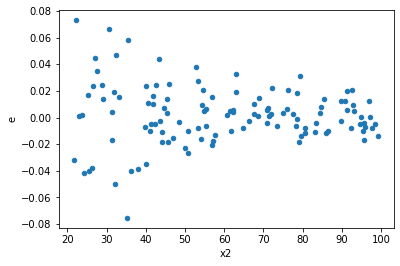

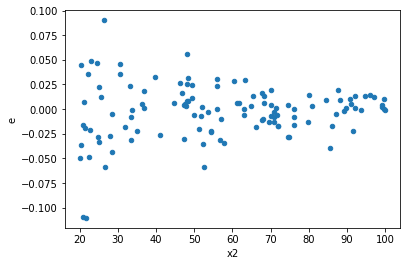

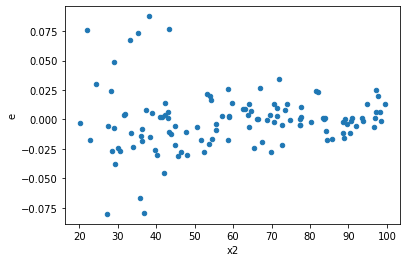

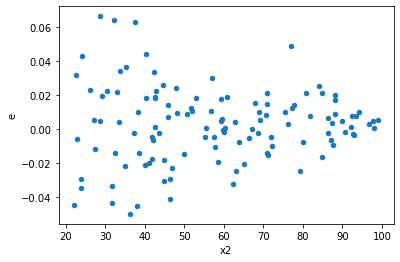

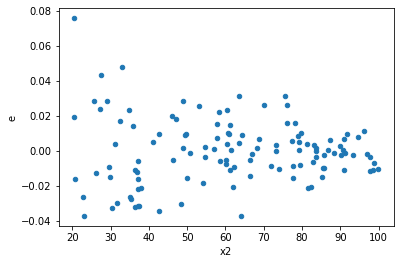

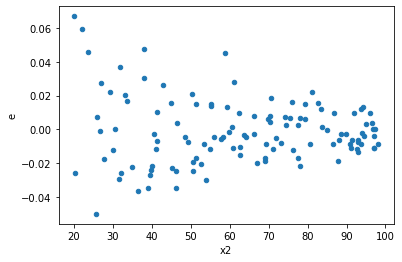

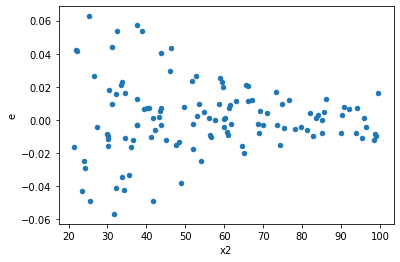

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,0.033134917240048245,0.004847075307002723,0.0007530663009101874,0.00011016080243188006,0.14628300628873595,2.9456422768469108e-09,Reject001=0 : Heteroscedasticity
1.0,44.0,44.0,0.0292848499759462,0.004922759173628884,0.0006655647721805955,0.00011188089030974737,0.16809917679866238,2.8513998643854697e-08,Reject001=0 : Heteroscedasticity
2.0,44.0,44.0,0.03429872641300755,0.008004703369097282,0.0007795165093865353,0.00018192507657039278,0.23338194172893703,4.025737629492288e-06,Reject001=0 : Heteroscedasticity
3.0,44.0,44.0,0.04197408812217839,0.005695154430976491,0.0009539565482313271,0.00012943532797673842,0.1356826243466923,8.303428744062839e-10,Reject001=0 : Heteroscedasticity
4.0,44.0,44.0,0.06101357351496833,0.007557387076233746,0.0013866721253401894,0.0001717587971871306,0.12386402960612868,1.7325846136293564e-10,Reject001=0 : Heteroscedasticity
5.0,44.0,44.0,0.057026871427917625,0.006809468371279725,0.0012960652597254006,0.00015476064480181192,0.11940806501873316,9.138792234085051e-11,Reject001=0 : Heteroscedasticity
6.0,44.0,44.0,0.041768591444405576,0.00822203782989232,0.0009492861691910358,0.00018686449613391636,0.19684738090428394,3.33104198881182e-07,Reject001=0 : Heteroscedasticity
7.0,44.0,44.0,0.027289656197750856,0.005054703565351697,0.0006202194590397922,0.00011487962648526583,0.1852241570477642,1.312100741839268e-07,Reject001=0 : Heteroscedasticity
8.0,44.0,44.0,0.027570239423889826,0.004668886100513259,0.0006265963505429506,0.0001061110477389377,0.1693451416481945,3.208265632929279e-08,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    999
Reject001=1 : Homoscedasticity        1
Name: Result_test, dtype: int64